In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
observations = 10000

xs  = np.random.uniform(-10, 10, (observations, 1))
zs = np.random.uniform(-10, 10, (observations, 1))
generated_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1, 1, (observations, 1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs = generated_inputs, targets = generated_targets)

In [3]:
training_data = np.load('TF_intro.npz')

In [7]:
inputs_size = 2
outputs_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(outputs_size,
    kernel_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1),
    bias_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1))
])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001)
model.compile(optimizer = custom_optimizer, loss = 'mean_squared_error')
model.fit(training_data['inputs'], training_data['targets'], epochs = 100, verbose = 0)

In [8]:
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]
print(weights, biases)

[[ 1.9927787]
 [-3.0026896]] [5.0131507]


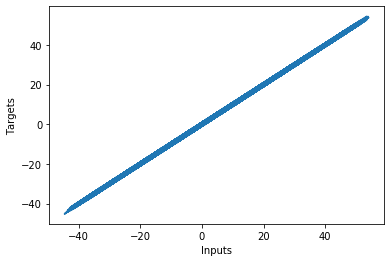

In [9]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('Inputs')
plt.ylabel('Targets')
plt.show()